In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

## 1.1 Linear Regression

### 1.1.1 (a)

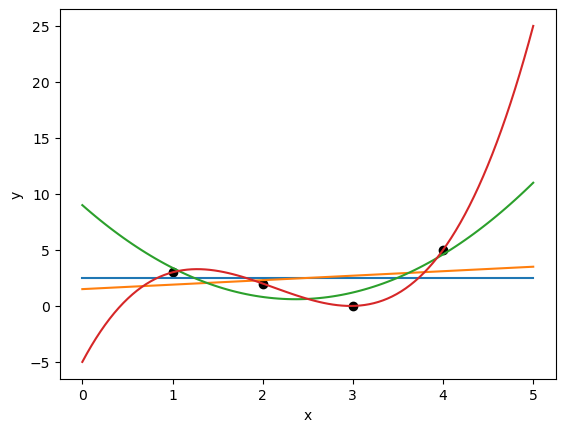

In [45]:
# 1.1.1 (a) Solution

# Dataset
X = [1, 2, 3, 4]
Y = [3, 2, 0, 5]
Xarray = np.array(X, dtype=np.float64)
Yarray = np.array(Y, dtype=np.float64)

# Store the dimensions in an array
dimensions = [1, 2, 3, 4]

# Loop through each polynomial degree
for d in dimensions:
    # Create a Vandermonde matrix that takes the data
    # Then solve the least square problem
    X = np.vander(Xarray, d)
    w = np.linalg.inv(X.T @ X) @ X.T @ Yarray

    # Create a matrix to represent the polynomial function for plotting the predicted curve
    xp = np.linspace(0, 5, 100)
    yp = np.vander(xp, d) @ w
    plt.plot(xp, yp)
    

# Initiate the plot
plt.scatter(Xarray, Yarray, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### 1.1.1 (b)

In [ ]:
# 1.1.1 (b) Solution

# Same steps as before
for d in dimensions:
    if d < 4:
        X = np.vander(Xarray, d)
        w = np.linalg.inv(X.T @ X) @ X.T @ Yarray

        print()
        print("The equation corresponding to K: {0}:".format(d))

        # Identify the signs
        sign = {True: "+", False: "-"}
        # Iterate over the reversed form of the least squre solution
        for w, coeff in enumerate(reversed(w)):
            Cosign = sign[coeff >= 0]
            if w > 0:
                print(f" {Cosign} {abs(coeff):.2f}x^{w}", end=" ")
            else:
                print(f"{coeff:.2f}", end="")



The equation corresponding to K: 1:
2.50
The equation corresponding to K: 2:
1.50 + 0.40x^1 
The equation corresponding to K: 3:
9.00 - 7.10x^1  + 1.50x^2 

### 1.1.1 (c)

In [ ]:
# 1.1.1 (c) Solution

# Same steps as before
for d in dimensions:
    X = np.vander(Xarray, d)
    w = np.linalg.inv(X.T @ X) @ X.T @ Yarray

    # Calculate Mean Squared Error=SSE/M
    MSE = np.mean(((X @ w) - Yarray) ** 2)
    print(" k: {0} MSE: {1}".format(d, MSE))

 k: 1 MSE: 3.25
 k: 2 MSE: 3.05
 k: 3 MSE: 0.7999999999999999
 k: 4 MSE: 1.8374029875272024e-24


### 1.1.2 
### a.i

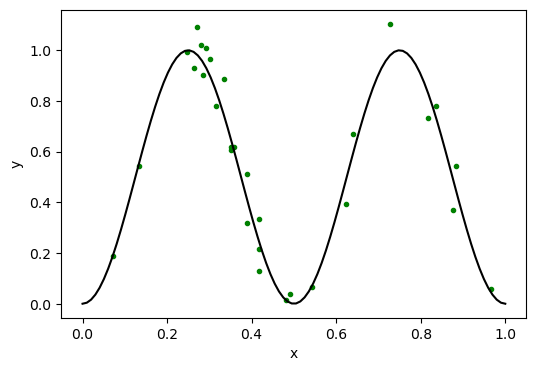

In [42]:
# 1.1.2 solution
# a.i
import numpy as np
import matplotlib.pyplot as plt

# Generate random data between [0,1] and calculate the formula of sin
X_random = np.random.uniform(0, 1, 30)
Y_eq = np.sin(2 * np.pi * X_random) ** 2 + np.random.normal(0, 0.07, 30)


# Initiate the plot
plt.figure(figsize=(6, 4)) 
xp = np.linspace(0, 1, 100)
yp = np.sin(2 * np.pi * xp) ** 2
plt.plot(xp, yp, color="black")
plt.scatter(X_random, Y_eq, color="green", marker=".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


### 1.1.2
### a.ii

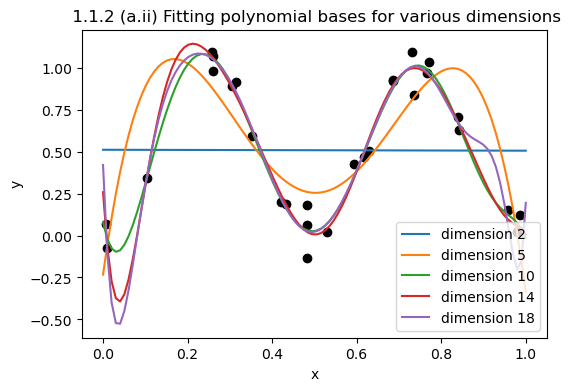

In [41]:
# 1.1.2 solution
# a.ii
import numpy as np
import matplotlib.pyplot as plt
import math


# Create a function that solve the linear equation to find the polynomial coefficients
def polynomial(x, y, dimensions):
    X = np.vander(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return X, w


# create a function that solves  sin2(2πx) + ϵ , ϵ is going to be the noise with a standerd deviation of 0.07
def g_x_segma(x):
    output = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07)
    return output


# Generate random data between [0,1]
X_random = np.random.uniform(0, 1, 30)
Y_eq = np.array(
    [g_x_segma(x) for x in X_random]
)  #  the g0.07 is applied to each x creating the data set


# Initiate the plot
x_grid = np.linspace(
    0, 1, 100
)  # this will create 30 values between [0,1], the purpose is to generate smooth lines for bettwer visullaization
plt.figure(figsize=(6, 4)) 
plt.scatter(X_random, Y_eq, color="black")

#  Fit the data set with a polynomial bases of dimension k = 2,5,10,14,18
dimensions = [2, 5, 10, 14, 18]
for d in dimensions:
    _, w = polynomial(X_random, Y_eq, d)  # solve the linear equation to find w
    fit_x_grid = np.vander(
        x_grid, d
    )  # create a vandermonde matrix to fit the poly degrees
    y_pred = (
        fit_x_grid @ w
    )  # calculate the y_predition by taking the product of the coeffiecnt w and the fitted x_grid
    plt.plot(x_grid, y_pred, label=f"dimension {d}")

plt.xlabel("x")
plt.ylabel("y")
plt.title(" 1.1.2 (a.ii) Fitting polynomial bases for various dimensions")
plt.legend()
plt.show()

### 1.1.2 

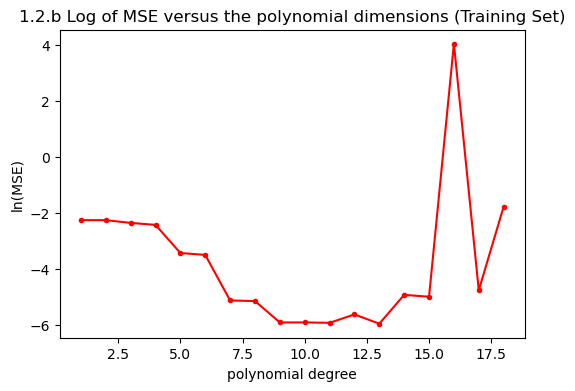

In [30]:
# 1.1.2 solution
# b

import numpy as np
import matplotlib.pyplot as plt


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = np.vander(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = np.vander(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# create a function that solves  sin2(2πx) + ϵ , ϵ is going to be the noise with a standerd deviation of 0.07
def g_x_segma(x):
    output = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07)
    return output


# Generate random data between [0,1] and calculate the formula of sin
X_train = np.random.uniform(0, 1, 30)
Y_eq = np.array(
    [g_x_segma(x) for x in X_train]
)  #  the g0.07 is applied to each x creating the data set

# Fill the dimensions
dimensions = range(1, 19)

# Call the functions of the polynomial and MSE using a loop that will iterate over each k
mse_arr = []
for d in dimensions:
    w = polynomial(X_train, Y_eq, d)
    MeanSquaredError = MSE(X_train, Y_eq, w, d)
    mse_arr.append(MeanSquaredError)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(mse_arr), color="red", marker=".")
plt.xlabel("polynomial degree")
plt.ylabel("ln(MSE)")
plt.title("1.2.b Log of MSE versus the polynomial dimensions (Training Set)")
plt.show()

### 1.1.2 (c)

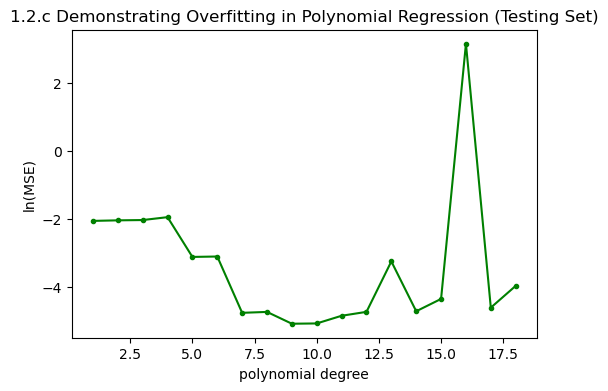

In [31]:
# 1.1.2 solution
# c
import numpy as np
import matplotlib.pyplot as plt


def g_x_segma(x):
    output = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07)
    return output


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = np.vander(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = np.vander(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# Generate random data between [0,1] and calculate the formula of sin
X_train = np.random.uniform(0, 1, 30)
Y_train = np.array(
    [g_x_segma(x) for x in X_train]
)  #  the g0.07 is applied to each x creating the data set


# Generate a test set with 1000 points
Xtest = np.random.uniform(0, 1, 1000)
Ytest = np.array(
    [g_x_segma(x) for x in Xtest]
)  #  the g0.07 is applied to each x creating the data set

# Fill the dimensions of the polynomial
dimensions = range(1, 19)

# Calculate the mean squared error (MSE) for each dimension by first fitting the polynomial model to the training data,
# Calculate the predicted value for the test data, and then perform MSE equation between the predicted and actual values
mse_test_arr = []
for d in dimensions:
    w = polynomial(X_train, Y_train, d)
    MeanSquaredError = MSE(Xtest, Ytest, w, d)
    mse_test_arr.append(MeanSquaredError)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(mse_test_arr), color="green", marker=".")
plt.xlabel("polynomial degree")
plt.ylabel("ln(MSE)")
plt.title("1.2.c Demonstrating Overfitting in Polynomial Regression (Testing Set)")
plt.show()

### 1.1.2 
### d-b

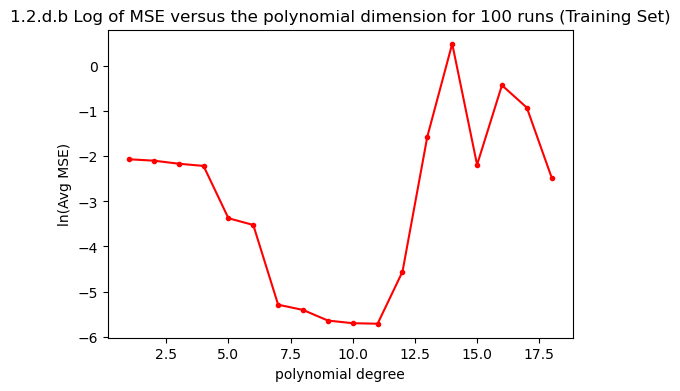

In [32]:
# 1.1.2 solution
# d based on b
import numpy as np
import matplotlib.pyplot as plt


def g_x_segma(x):
    output = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07)
    return output


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = np.vander(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = np.vander(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# Fill the dimensions of the polynomial
dimensions = range(1, 19)

# Calculate the mean squared error (MSE) for each dimension by first fitting the polynomial model to the training data,
# Calculate the predicted value for the test data, and then perform MSE equation between the predicted and actual values
GeneralMSE = []
for _ in range(100):
    # Generate random data between [0,1] and calculate the formula of sin
    X_train = np.random.uniform(0, 1, 30)
    Y_train = np.array(
        [g_x_segma(x) for x in X_train]
    ) 

    # Call the functions of polynomial and MSE for each k
    MSEperD = []
    for d in dimensions:
        w = polynomial(X_train, Y_train, d)
        MeanSquaredError = MSE(X_train, Y_train, w, d)
        MSEperD.append(MeanSquaredError)
    GeneralMSE.append(MSEperD)

# Now take the avg of all the stored MSE
AvgMSE = np.mean(GeneralMSE, axis=0)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(AvgMSE), color="red", marker=".")
plt.xlabel("polynomial degree")
plt.ylabel("ln(Avg MSE)")
plt.title(
    "1.2.d.b Log of MSE versus the polynomial dimension for 100 runs (Training Set)"
)
plt.show()

### 1.1.2
### d-c

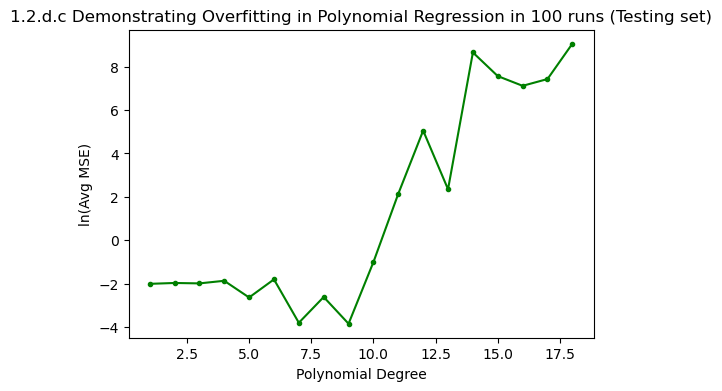

In [33]:
# 1.1.2 solution
# d based on c
import numpy as np
import matplotlib.pyplot as plt


def g_x_segma(x):
    output = np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07)
    return output


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = np.vander(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = np.vander(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# Fill the dimensions of the polynomial
dimensions = range(1, 19)

# calculate the mean squared error (MSE) for each dimension by first fitting the polynomial model to the training data,
# calculate the predicted value for the test data, and then perform MSE equation between the predicted and actual values
# this time, it will be for 100 run
GeneralMSE = []
for _ in range(100):
    # Generate random data between [0,1] and calculate the formula of sin
    X_train = np.random.uniform(0, 1, 30)
    Y_train = np.array(
        [g_x_segma(x) for x in X_train]
    )  #  the g0.07 is applied to each x creating the data set

    # Generate a test set with 1000 points
    Xtest = np.random.uniform(0, 1, 1000)
    Ytest = np.array(
        [g_x_segma(x) for x in Xtest]
    )  #  the g0.07 is applied to each x creating the data set

    # Call the functions of polynomial and MSE for each k
    MSEperD = []
    for d in dimensions:
        w = polynomial(X_train, Y_train, d)
        MeanSquaredError = MSE(Xtest, Ytest, w, d)
        MSEperD.append(MeanSquaredError)
    GeneralMSE.append(MSEperD)

# Now take the avg of all the stored MSE
AvgMSE_test = np.mean(GeneralMSE, axis=0)

# Intitiate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(AvgMSE_test), color="green", marker=".")
plt.xlabel("Polynomial Degree")
plt.ylabel("ln(Avg MSE)")
plt.title(
    "1.2.d.c Demonstrating Overfitting in Polynomial Regression in 100 runs (Testing set)"
)
plt.show()


### 1.1.3 (b)

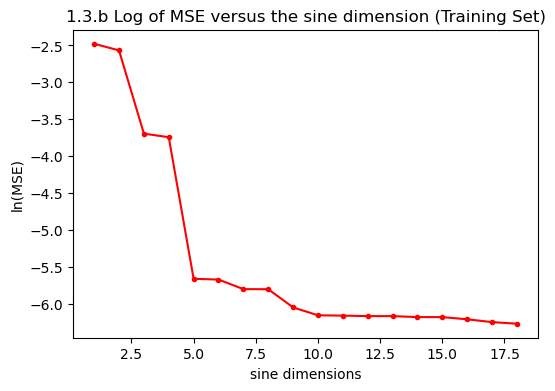

In [34]:
# 1.1.3 for b

import numpy as np
import matplotlib.pyplot as plt


# function to return the sine basis functions
def sine_basis(x, d):
    # this will prdouce an array from the sin formula for each k value.
    # sin(k*phi*x)
    X = np.array([np.sin(k * np.pi * x) for k in range(1, d + 1)]).T
    return X


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = sine_basis(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = sine_basis(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse
    Y_train = np.array(
        [g_x_segma(x) for x in X_train]
    )  #  the g0.07 is applied to each x creating the data set


# Generate random data between [0,1] and calculate the formula of sin
X_train = np.random.uniform(0, 1, 30)
Y_eq = np.array(
    [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in X_train]
)

# Fill the dimensions
dimensions = range(1, 19)

# Call the functions of the polynomial and MSE using a loop that will iterate over each k
mse_arr_sine = []
for d in dimensions:
    w = polynomial(X_train, Y_eq, d)
    MeanSquaredError = MSE(X_train, Y_eq, w, d)
    mse_arr_sine.append(MeanSquaredError)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(mse_arr_sine), color="red", marker=".")
plt.xlabel("sine dimensions")
plt.ylabel("ln(MSE)")
plt.title("1.3.b Log of MSE versus the sine dimension (Training Set)")
plt.show()

### 1.1.3 (c)

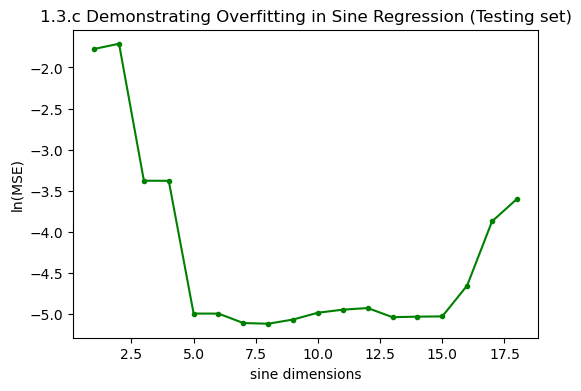

In [35]:
# Solution
# 1.3 for c
import numpy as np
import matplotlib.pyplot as plt


# function to return the basis functions
def sine_basis(x, d):
    # this will prdouce an array from the sin formula for each k value.
    # sin(k*phi*x)
    X = np.array([np.sin(k * np.pi * x) for k in range(1, d + 1)]).T
    return X


# Create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = sine_basis(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# Create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = sine_basis(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# Generate random data between [0,1] and calculate the formula of sin
X_train = np.random.uniform(0, 1, 30)
Y_train = np.array(
    [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in X_train]
)


# Generate a test set with 1000 points
Xtest = np.random.uniform(0, 1, 1000)
Ytest = np.array(
    [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in Xtest]
)

# Fill the dimensions of the polynomial
dimensions = range(1, 19)

# Calculate the mean squared error (MSE) for each dimension by first fitting the polynomial model to the training data,
# Calculate the predicted value for the test data, and then perform MSE equation between the predicted and actual values
mse_test_arr = []
for d in dimensions:
    w = polynomial(X_train, Y_train, d)
    MeanSquaredError = MSE(Xtest, Ytest, w, d)
    mse_test_arr.append(MeanSquaredError)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(mse_test_arr), color="green", marker=".")
plt.xlabel("sine dimensions")
plt.ylabel("ln(MSE)")
plt.title("1.3.c Demonstrating Overfitting in Sine Regression (Testing set)")
plt.show()

### 1.1.3 
### d-b

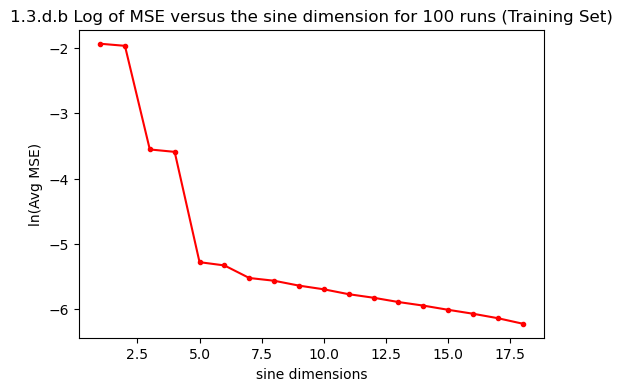

In [36]:
# Solution
# 1.1.3 for d / b

import numpy as np
import matplotlib.pyplot as plt


# function to return the basis functions
def sine_basis(x, d):
    # this will prdouce an array from the sin formula for each k value.
    # sin(k*phi*x)
    X = np.array(
        [np.sin(k * np.pi * x) for k in range(1, d + 1)]
    ).T  # transpose to that the shape will become (Num_of_time, dimension)
    return X


# create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = sine_basis(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = sine_basis(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# fill the dimensions
dimensions = range(1, 19)

# Create an empty list to store MSE values for the 100 run
GeneralMSE = []
for _ in range(100):
    # Generate random data between [0,1] and calculate the formula of sin
    X_train = np.random.uniform(0, 1, 30)
    Y_eq = np.array(
        [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in X_train]
    )

    # Call the functions of polynomial and MSE for each k
    MSEperD = []
    for d in dimensions:
        w = polynomial(X_train, Y_eq, d)
        MeanSquaredError = MSE(X_train, Y_eq, w, d)
        MSEperD.append(MeanSquaredError)
    GeneralMSE.append(MSEperD)

# Now take the avg of all the stored MSE
AvgMSE = np.mean(GeneralMSE, axis=0)

# Initate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(AvgMSE), color="red", marker=".")
plt.xlabel("sine dimensions")
plt.ylabel("ln(Avg MSE)")
plt.title("1.3.d.b Log of MSE versus the sine dimension for 100 runs (Training Set)")
plt.show()


### 1.1.3
### d-c

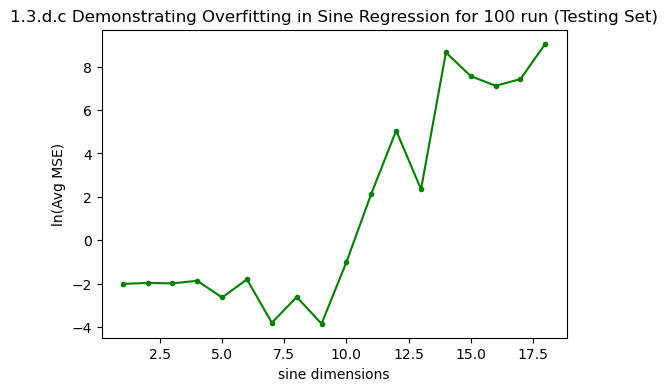

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# function to return the basis functions
def sine_basis(x, d):
    # this will prdouce an array from the sin formula for each k value.
    # sin(k*phi*x)
    X = np.array(
        [np.sin(k * np.pi * x) for k in range(1, d + 1)]
    ).T  # transpose to that the shape will become (Num_of_time, dimension)
    return X


# create a poly function that will return the values of w
def polynomial(x, y, dimensions):
    X = sine_basis(x, dimensions)
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w


# create a function that will calculate the mean squared error
def MSE(x_data, true_y, w, d):
    X = sine_basis(x_data, d)
    y_pred = np.dot(X, w)
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# fill the dimensions of the polynomial
dimensions = range(1, 19)
for _ in range(100):
    GeneralMSE_test = []
    # Generate random data between [0,1] and calculate the formula of sin
    X_train = np.random.uniform(0, 1, 30)
    Y_train = np.array(
        [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in X_train]
    )

    # Generate a test set with 1000 points
    Xtest = np.random.uniform(0, 1, 1000)
    Ytest = np.array(
        [np.sin(2 * np.pi * x) ** 2 + np.random.normal(0, 0.07) for x in Xtest]
    )

    # Call the functions of polynomial and MSE for each k
    MSEperD_test = []
    for d in dimensions:
        w = polynomial(X_train, Y_train, d)
        MeanSquaredError = MSE(Xtest, Ytest, w, d)
        MSEperD_test.append(MeanSquaredError)

    GeneralMSE_test.append(AvgMSE_test)

# Now take the avg of all the stored MSE
AvgMSE = np.mean(GeneralMSE_test, axis=0)

# Intitiate the plot
plt.figure(figsize=(6, 4)) 
plt.plot(dimensions, np.log(AvgMSE), color="green", marker=".")
plt.xlabel("sine dimensions")
plt.ylabel("ln(Avg MSE)")
plt.title(
    "1.3.d.c Demonstrating Overfitting in Sine Regression for 100 run (Testing Set)"
)
plt.show()


## 1.2 Filtered Boston housing and kernels

### (a)

In [ ]:
# (a), (b)
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("./Boston-filtered.csv")


# create a function that will calculate the mean squared error
def MSE(y_pred, true_y):
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# function to calculate the coefficients using least squares regression
def least_squares(x_data, y_data):
    w = np.linalg.solve(x_data.T @ x_data, x_data.T @ y_data)
    return w


# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i]

# store the target which is column 13 in y
y = data.iloc[:, -1].values


avg_train = 0
avg_test = 0

train_mse = []
test_mse = []
for _ in range(20):
    # to get a different (2/3, 1/3) random split for each run
    shuffle = np.arange(len(y))
    np.random.shuffle(shuffle)
    suffled_data_y = y[shuffle]

    #  The training set should be 2/3, and the test set should be 1/3.
    # we first store the size of 2/3 in a varible
    ratio = 2 / 3
    total_rows = data.shape[0]
    split = int(total_rows * ratio)

    # split data into test and train
    train_set = suffled_data_y[
        0:split
    ]  # then take 2/3 of the data and store it in the training set. [:split] will take all the values untill two-thirds
    test_set = suffled_data_y[split:]  # this will take the rest which consists the 1/3

    #  now, we create a vector of ones that is the same length as the training and testing sets using the function ones.
    vector_train = np.ones((len(train_set), 1))
    vector_test = np.ones((len(test_set), 1))

    # now, we call the least_squares function we previously defined which is going to be the constant function
    w = least_squares(vector_train, train_set)

    train_pred = vector_train * w
    test_pred = vector_test * w

    # Calculate the MSE on the training and test sets and note down the results.
    # by calling the previously defined function MSE
    MeanSquareError_train = MSE(train_pred, train_set)
    MeanSquareError_test = MSE(test_pred, test_set)

    train_mse.append(MeanSquareError_train)
    test_mse.append(MeanSquareError_test)


avg_train = np.mean(train_mse)
avg_test = np.mean(test_mse)

print(
    f" *Naive Regression* \nAverage Training MSE: {avg_train:.2f}, Average Test MSE: {avg_test:.2f}"
)


 *Naive Regression* 
Average Training MSE: 84.06, Average Test MSE: 85.35


### (b)

#### Give a simple interpretation of the constant function in ‘a.’ above.
In the solution above, we used least squares regression as a constant function on vector of ones, this approach averages the housing price in the training dataset to predict the target. The constant function in this case provides a good mean prediction by minimizing the MSE.
Mathematically, this can be represented as:

$$
f(x_i) = \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

### (c)

In [ ]:
# (c)

import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("./Boston-filtered.csv")


# create a function that will calculate the mean squared error
def MSE(y_pred, true_y):
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# function to calculate the coefficients using least squares regression
def least_squares(x_data, y_data):
    w = np.linalg.solve(x_data.T @ x_data, x_data.T @ y_data)
    return w


# function to generate the prediction
def predict(value, w):
    return value @ w


# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i]

# store the target which is column 13 in y
y = data.iloc[:, -1].values

# initiate varibles
features = x.columns
avg_train = {}  # dictionaries to sotre the values of each features as they will be running for 20 times
avg_test = {}


# loop through each feature
for feature in features:
    train_mse = []
    test_mse = []
    for _ in range(20):
        # to get a different (2/3, 1/3) random split for each run
        shuffle = np.arange(len(y))
        np.random.shuffle(shuffle)

        suffled_data_x = x[feature].values[shuffle]
        suffled_data_y = y[shuffle]

        #  The training set should be 2/3, and the test set should be 1/3.
        # we first store the size of 2/3 in a varible
        ratio = 2 / 3
        total_rows = data.shape[0]
        split = int(total_rows * ratio)

        x_train_set, x_test_set = suffled_data_x[:split], suffled_data_x[split:]
        y_train_set, y_test_set = suffled_data_y[:split], suffled_data_y[split:]

        #  the bias term agumented with (xi,1) where the array of ones represents 1 and x_train_set, x_test_set represent xi
        train = np.column_stack((np.ones(len(y_train_set)), x_train_set))
        test = np.column_stack((np.ones(len(y_test_set)), x_test_set))

        # now, we call the least_squares function we previously defined which is going to be the constant function
        w = least_squares(train, y_train_set)

        # call the predict function
        train_pred = predict(train, w)
        test_pred = predict(test, w)

        # Calculate the MSE on the training and test sets and note down the results.
        # by calling the previously defined function MSE
        MeanSquareError_train = MSE(train_pred, y_train_set)
        MeanSquareError_test = MSE(test_pred, y_test_set)

        train_mse.append(MeanSquareError_train)
        test_mse.append(MeanSquareError_test)

    avg_train[feature] = np.mean(train_mse)
    avg_test[feature] = np.mean(test_mse)

print("            **Linear Regression with single attributes** \n")
for feature in features:
    print(
        f"Feature ({feature}): Average Training MSE: {avg_train[feature]:.2f},  Average Test MSE: {avg_test[feature]:.2f}"
    )


            **Linear Regression with single attributes** 

Feature (CRIM): Average Training MSE: 69.36,  Average Test MSE: 76.84
Feature ( ZN ): Average Training MSE: 72.19,  Average Test MSE: 76.41
Feature (INDUS ): Average Training MSE: 66.27,  Average Test MSE: 61.79
Feature (CHAS): Average Training MSE: 82.54,  Average Test MSE: 81.18
Feature (NOX): Average Training MSE: 67.86,  Average Test MSE: 71.65
Feature (RM): Average Training MSE: 42.98,  Average Test MSE: 45.37
Feature (AGE): Average Training MSE: 71.37,  Average Test MSE: 74.91
Feature (DIS): Average Training MSE: 78.56,  Average Test MSE: 80.86
Feature (RAD): Average Training MSE: 71.40,  Average Test MSE: 74.05
Feature (TAX): Average Training MSE: 64.71,  Average Test MSE: 68.58
Feature (PTRATIO): Average Training MSE: 61.37,  Average Test MSE: 65.75
Feature (LSTAT): Average Training MSE: 38.20,  Average Test MSE: 39.26


### (d)

In [ ]:
# (d)

import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("./Boston-filtered.csv")


# create a function that will calculate the mean squared error
def MSE(y_pred, true_y):
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# function to calculate the coefficients using least squares regression
def least_squares(x_data, y_data):
    w = np.linalg.solve(x_data.T @ x_data, x_data.T @ y_data)
    return w


# function to generate the prediction
def predict(value, w):
    return value @ w


# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i].values

# store the target which is column 13 in y
y = data.iloc[:, -1].values

# initiate varibles
avg_train = {}  # dictionaries to sotre the values of each features as they will be running for 20 times
avg_test = {}

train_mse = []
test_mse = []
for _ in range(20):
    # to get a different (2/3, 1/3) random split for each run
    shuffle = np.arange(len(y))
    np.random.shuffle(shuffle)

    suffled_data_x = x[shuffle]
    suffled_data_y = y[shuffle]

    #  The training set should be 2/3, and the test set should be 1/3.
    # we first store the size of 2/3 in a varible
    ratio = 2 / 3
    total_rows = data.shape[0]
    split = int(total_rows * ratio)

    x_train_set, x_test_set = suffled_data_x[:split], suffled_data_x[split:]
    y_train_set, y_test_set = suffled_data_y[:split], suffled_data_y[split:]

    #  the bias term agumented with (xi,1) where the array of ones represents 1 and x_train_set, x_test_set represent xi
    train = np.column_stack((np.ones(len(y_train_set)), x_train_set))
    test = np.column_stack((np.ones(len(y_test_set)), x_test_set))

    # now, we call the least_squares function we previously defined which is going to be the constant function
    w = least_squares(train, y_train_set)

    # call the predict function
    train_pred = predict(train, w)
    test_pred = predict(test, w)

    # Calculate the MSE on the training and test sets and note down the results.
    # by calling the previously defined function MSE
    MeanSquareError_train = MSE(train_pred, y_train_set)
    MeanSquareError_test = MSE(test_pred, y_test_set)

    train_mse.append(MeanSquareError_train)
    test_mse.append(MeanSquareError_test)


avg_train = np.mean(train_mse)
avg_test = np.mean(test_mse)


print(" Linear Regression using all attributes ")
print(f" Training MSE: {avg_train:.2f}, Average Test MSE: {avg_test:.2f}")


 Linear Regression using all attributes 
 Training MSE: 22.53, Average Test MSE: 23.69


###  1.3 Kernelised ridge regression

### (a), (c)

In [ ]:
# ( a ) and ( c )
import numpy as np
import pandas as pd


# create a function that will calculate the mean squared error
def MSE(y_pred, true_y):
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# create a function to calculate gaussian kernel
def gaussian_kernel(
    m1, m2, sigma
):  # we use reshape here bc the output without reshaping will be (n,)
    Eu_distance = (
        np.sum(m1**2, axis=1).reshape(-1, 1)
        + np.sum(m2**2, axis=1)
        - 2 * np.dot(m1, m2.T)
    )  # calculate the squared euclidean distance
    GK = np.exp(-Eu_distance / (2 * sigma**2))
    return GK


# create a function for KRR
def kernel_ridge_regression(K, y, gamma):
    # (K + gamma * n * I) * alpha = y
    n = K.shape[0]
    I = np.eye(n)  # I: Identity matrix of shape (n, n)
    alpha = np.linalg.solve(K + gamma * n * I, y)
    return alpha


# create a function for cross validation using five-fold
def cross_validation(x_train, y_train, gamma_vector, sigma_vector):
    gamma, sigma, best_mse = None, None, float("inf")
    fold_size = x_train.shape[0] // 5

    # loop through gama and sigma to find the optimal values
    for g in gamma_vector:
        for s in sigma_vector:
            mse = []
            for k in range(
                5
            ):  # on each iteration, one fold will be used as validation set and the remaining data is used for training
                # to calculate the start and end indices for the validation fold
                start, end = k * fold_size, (k + 1) * fold_size
                x_fold, y_fold = (
                    x_train[start:end],
                    y_train[start:end],
                )  # the intended folds

                # this way, we combine the data before and after the fold into a single training set
                x_train_set = np.concatenate((x_train[:start], x_train[end:]), axis=0)
                y_train_set = np.concatenate((y_train[:start], y_train[end:]), axis=0)

                # compute the kernel matrix for the training data by calling gaussian kernel function
                k = gaussian_kernel(x_train_set, x_train_set, s)

                # compute the alpha in the kernel ridge regression formula that will be used as the weights for each training
                alpha = kernel_ridge_regression(k, y_train_set, g)

                pred_y = gaussian_kernel(x_fold, x_train_set, s).dot(alpha)
                # call the MSE function
                mse.append(MSE(y_fold, pred_y))

            # update the values to obtain the optimal values which have the lowest cross validation error
            avg_mse = np.mean(mse)
            if avg_mse < best_mse:
                best_mse = avg_mse
                gamma = g
                sigma = s

    return gamma, sigma


data = pd.read_csv("./Boston-filtered.csv")

# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i].values

# store the target which is column 13 in y
y = data.iloc[:, -1].values

# 2/3 of data for training and 1/3 for testing
ratio = 2 / 3
total_rows = data.shape[0]
split = int(total_rows * ratio)

shuffled_data = np.random.permutation(len(x))

x_train, x_test = x[shuffled_data[:split]], x[shuffled_data[split:]]
y_train, y_test = y[shuffled_data[:split]], y[shuffled_data[split:]]

# Create a vector of γ values [2−40,2−39,...,2−26]
gamma_vector = np.power(2, [float(exponant) for exponant in range(-40, -25)])
# Create a vector  of σ values [27,27.5,...,212.5,213]
sigma_vector = np.power(2, np.array([7 + 0.5 * i for i in range(13)]))

gamma, sigma = cross_validation(x_train, y_train, gamma_vector, sigma_vector)
print(f"(a):  Best σ : {np.log2(gamma)},  Best γ: {np.log2(sigma)}")

# now, after finding the best gamma and sigma values
# we will calculate the MSE on the training and test sets for the best γ and σ.

# computing the kernel matrix by calling gaussian kernal function, and then train model by calling kernel ridge regression
K_train = gaussian_kernel(x_train, x_train, sigma)
alpha = kernel_ridge_regression(K_train, y_train, gamma)
y_train_pred = K_train.dot(
    alpha
)  # after we solve the value alpha, we make the prediction on the training set using the kernal matrix and alpha

# computing the kernak matrix for testing
K_test = gaussian_kernel(x_test, x_train, sigma)
y_test_pred = K_test.dot(
    alpha
)  # make the predcition on the test set using K_test and alpha

# Lastly, we calculate the MSE for each train and test set
train_mse = MSE(y_train_pred, y_train)
test_mse = MSE(y_test_pred, y_test)

print(f"\n(c): Training MSE: {train_mse}, Testing MSE: {test_mse}")


(a):  Best σ : -34.0,  Best γ: 9.0

(c): Training MSE: 4.540366776324811, Testing MSE: 15.743638334050754


### (b)

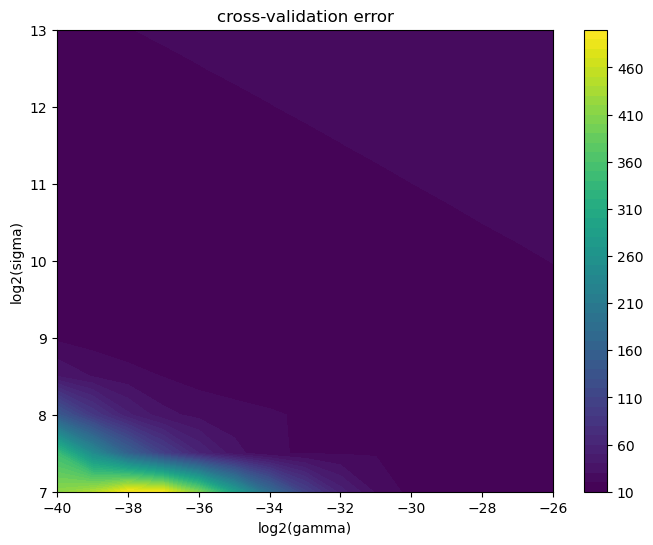

In [ ]:
# (b)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# create a function that will calculate the mean squared error
def MSE(y_pred, true_y):
    mse = np.mean((true_y - y_pred) ** 2)  # measure the MSE
    return mse


# create a function to calculate gaussian kernel
def gaussian_kernel(
    m1, m2, sigma
):  # we use reshape here bc the output without reshaping will be (n,)
    Eu_distance = (
        np.sum(m1**2, axis=1).reshape(-1, 1)
        + np.sum(m2**2, axis=1)
        - 2 * np.dot(m1, m2.T)
    )  # calculate the squared euclidean distance
    GK = np.exp(-Eu_distance / (2 * sigma**2))
    return GK


# create a function for KRR
def kernel_ridge_regression(K, y, gamma):
    # (K + gamma * n * I) * alpha = y
    n = K.shape[0]
    I = np.eye(n)  # I: Identity matrix of shape (n, n)
    alpha = np.linalg.solve(K + gamma * n * I, y)
    return alpha


# create a function for cross validation using five-fold
def cross_validation(x_train, y_train, gamma_vector, sigma_vector):
    fold_size = x_train.shape[0] // 5
    errors = np.zeros((len(gamma_vector), len(sigma_vector)))

    # loop through gama and sigma to find the optimal values
    for i, g in enumerate(gamma_vector):
        for j, s in enumerate(sigma_vector):
            mse = []
            for k in range(
                5
            ):  # on each iteration, one fold will be used as validation set and the remaining data is used for training
                # to calculate the start and end indices for the validation fold
                start, end = k * fold_size, (k + 1) * fold_size
                x_fold, y_fold = (
                    x_train[start:end],
                    y_train[start:end],
                )  # the intended folds

                # this way, we combine the data before and after the fold into a single training set
                x_train_set = np.concatenate((x_train[:start], x_train[end:]), axis=0)
                y_train_set = np.concatenate((y_train[:start], y_train[end:]), axis=0)

                # compute the kernel matrix for the training data by calling gaussian kernel function
                k = gaussian_kernel(x_train_set, x_train_set, s)

                # compute the alpha in the kernel ridge regression formula
                alpha = kernel_ridge_regression(k, y_train_set, g)

                pred_y = gaussian_kernel(x_fold, x_train_set, s).dot(alpha)

                mse.append(MSE(y_fold, pred_y))

            # (mean over folds of validation error)
            errors[i, j] = np.mean(mse)

    return errors


data = pd.read_csv("./Boston-filtered.csv")

# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i].values

# store the target which is column 13 in y
y = data.iloc[:, -1].values

# 2/3 of data for training and 1/3 for testing
ratio = 2 / 3
total_rows = data.shape[0]
split = int(total_rows * ratio)

# shuffle the data
shuffled_data = np.random.permutation(len(x))
x = x[shuffled_data]
y = y[shuffled_data]


# Create a vector of γ values [2−40,2−39,...,2−26]
gamma_vector = np.power(2, [float(exponant) for exponant in range(-40, -25)])
# Create a vector  of σ values [27,27.5,...,212.5,213]
sigma_vector = np.power(2, np.array([7 + 0.5 * i for i in range(13)]))


# call the cross_validation function and pass the parameters to get the error
error = cross_validation(x, y, gamma_vector, sigma_vector)

gamma_log = np.log2(gamma_vector)
sigma_log = np.log2(sigma_vector)

# after doing some research, i found that contour plot would display a good represenation of Kernelised ridge regression
# plotting log2 gamma and sigma for a better interpretation and visualization
X_grid, Y_grid = np.meshgrid(gamma_log, sigma_log)
plt.figure(figsize=(8, 6))
contour = plt.contourf(X_grid, Y_grid, error.T, levels=50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel("log2(gamma)")
plt.ylabel("log2(sigma)")
plt.title("cross-validation error")
plt.show()


### (d)

In [4]:
# (d)
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("./Boston-filtered.csv")


# function to calculate Mean Squared Error (MSE)
def MSE(y_pred, true_y):
    return np.mean((true_y - y_pred) ** 2)


# function to calculate least squares solution
def least_squares(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)


# function for predictions
def predict(X, w):
    return X @ w


# Naive Regression
def naive_regression(y):
    train_mse = []
    test_mse = []
    for _ in range(20):
        # to get a different (2/3, 1/3) random split for each run
        shuffle = np.arange(len(y))
        np.random.shuffle(shuffle)
        suffled_data_y = y[shuffle]

        #  The training set should be 2/3, and the test set should be 1/3.
        # we first store the size of 2/3 in a varible
        ratio = 2 / 3
        total_rows = data.shape[0]
        split = int(total_rows * ratio)

        # split data into test and train
        train_set = suffled_data_y[
            0:split
        ]  # then take 2/3 of the data and store it in the training set. [:split] will take all the values untill two-thirds
        test_set = suffled_data_y[
            split:
        ]  # this will take the rest which consists the 1/3

        #  now, we create a vector of ones that is the same length as the training and testing sets using the function ones.
        vector_train = np.ones((len(train_set), 1))
        vector_test = np.ones((len(test_set), 1))

        # now, we call the least_squares function we previously defined which is going to be the constant function
        w = least_squares(vector_train, train_set)

        train_pred = predict(vector_train, w)
        test_pred = predict(vector_test, w)

        # Calculate the MSE on the training and test sets and note down the results.
        # by calling the previously defined function MSE
        MeanSquareError_train = MSE(train_pred, train_set)
        MeanSquareError_test = MSE(test_pred, test_set)

        train_mse.append(MeanSquareError_train)
        test_mse.append(MeanSquareError_test)

    return np.mean(train_mse), np.std(train_mse), np.mean(test_mse), np.std(test_mse)


# Linear Regression with single attributes
def linear_regression_single_attribute(x, y):
    # initiate varibles
    features = x.shape[1]
    train_results = {}  # dictionaries to sotre the values of each features as they will be running for 20 times
    test_results = {}
    # loop through each feature
    for feature in range(features):
        MSE_train = []
        MSE_test = []
        for _ in range(20):
            # to get a different (2/3, 1/3) random split for each run
            shuffle = np.arange(len(y))
            np.random.shuffle(shuffle)

            suffled_data_x = x[shuffle]
            suffled_data_y = y[shuffle]

            #  The training set should be 2/3, and the test set should be 1/3.
            # we first store the size of 2/3 in a varible
            ratio = 2 / 3
            total_rows = data.shape[0]
            split = int(total_rows * ratio)

            x_feature = suffled_data_x[:, feature]
            x_train_set, x_test_set = x_feature[:split], x_feature[split:]
            y_train_set, y_test_set = suffled_data_y[:split], suffled_data_y[split:]

            #  the bias term agumented with (xi,1) where the array of ones represents 1 and x_train_set, x_test_set represent xi
            train, test = (
                np.column_stack((np.ones(len(y_train_set)), x_train_set)),
                np.column_stack((np.ones(len(y_test_set)), x_test_set)),
            )

            # now, we call the least_squares function we previously defined which is going to be the constant function
            w = least_squares(train, y_train_set)

            # call the predict function
            train_pred = predict(train, w)
            test_pred = predict(test, w)

            # Calculate the MSE on the training and test sets and note down the results.
            # by calling the previously defined function MSE
            MeanSquareError_train = MSE(train_pred, y_train_set)
            MeanSquareError_test = MSE(test_pred, y_test_set)

            MSE_train.append(MeanSquareError_train)
            MSE_test.append(MeanSquareError_test)

        train_results[feature] = (np.mean(MSE_train), np.std(MSE_train))
        test_results[feature] = (np.mean(MSE_test), np.std(MSE_test))
    return train_results, test_results


# Linear Regression with all attributes
def linear_regression_all_features(x, y):
    # initiate varibles
    train_result = {}  # dictionaries to sotre the values of each features as they will be running for 20 times
    test_result = {}

    train_mse = []
    test_mse = []
    for _ in range(20):
        # to get a different (2/3, 1/3) random split for each run
        shuffle = np.arange(len(y))
        np.random.shuffle(shuffle)

        suffled_data_x = x[shuffle]
        suffled_data_y = y[shuffle]

        #  The training set should be 2/3, and the test set should be 1/3.
        # we first store the size of 2/3 in a varible
        ratio = 2 / 3
        total_rows = data.shape[0]
        split = int(total_rows * ratio)

        x_train_set, x_test_set = suffled_data_x[:split], suffled_data_x[split:]
        y_train_set, y_test_set = suffled_data_y[:split], suffled_data_y[split:]

        #  the bias term agumented with (xi,1) where the array of ones represents 1 and x_train_set, x_test_set represent xi
        train = np.column_stack((np.ones(len(y_train_set)), x_train_set))
        test = np.column_stack((np.ones(len(y_test_set)), x_test_set))

        # now, we call the least_squares function we previously defined which is going to be the constant function
        w = least_squares(train, y_train_set)

        # call the predict function
        train_pred = predict(train, w)
        test_pred = predict(test, w)

        # Calculate the MSE on the training and test sets and note down the results.
        # by calling the previously defined function MSE
        MeanSquareError_train = MSE(train_pred, y_train_set)
        MeanSquareError_test = MSE(test_pred, y_test_set)

        train_mse.append(MeanSquareError_train)
        test_mse.append(MeanSquareError_test)

    train_result = np.mean(train_mse)
    test_result = np.mean(test_mse)
    return (
        np.mean(train_result),
        np.std(train_result),
        np.mean(test_result),
        np.std(test_result),
    )


# create a function to calculate gaussian kernel
def gaussian_kernel(
    m1, m2, sigma
):  # we use reshape here bc the output without reshaping will be (n,)
    Eu_distance = (
        np.sum(m1**2, axis=1).reshape(-1, 1)
        + np.sum(m2**2, axis=1)
        - 2 * np.dot(m1, m2.T)
    )  # calculate the squared euclidean distance
    GK = np.exp(-Eu_distance / (2 * sigma**2))
    return GK


# create a function for KRR
def kernel_ridge_regression(K, y, gamma):
    # (K + gamma * n * I) * alpha = y
    n = K.shape[0]
    I = np.eye(n)  # I: Identity matrix of shape (n, n)
    alpha = np.linalg.solve(K + gamma * n * I, y)
    return alpha


# create a function for cross validation using five-fold
def cross_validation(x_train, y_train, gamma_vector, sigma_vector):
    gamma, sigma, best_mse = None, None, float("inf")
    fold_size = x_train.shape[0] // 5

    # loop through gama and sigma to find the optimal values
    for g in gamma_vector:
        for s in sigma_vector:
            mse = []
            for k in range(
                5
            ):  # on each iteration, one fold will be used as validation set and the remaining data is used for training
                # to calculate the start and end indices for the validation fold
                start, end = k * fold_size, (k + 1) * fold_size
                x_fold, y_fold = (
                    x_train[start:end],
                    y_train[start:end],
                )  # the intended folds

                # this way, we combine the data before and after the fold into a single training set
                x_train_set = np.concatenate((x_train[:start], x_train[end:]), axis=0)
                y_train_set = np.concatenate((y_train[:start], y_train[end:]), axis=0)

                # compute the kernel matrix for the training data by calling gaussian kernel function
                k = gaussian_kernel(x_train_set, x_train_set, s)

                # compute the alpha in the kernel ridge regression formula that will be used as the weights for each training
                alpha = kernel_ridge_regression(k, y_train_set, g)

                pred_y = gaussian_kernel(x_fold, x_train_set, s).dot(alpha)
                # call the MSE function
                mse.append(MSE(y_fold, pred_y))

            # update the values to obtain the optimal values which have the lowest cross validation error
            avg_mse = np.mean(mse)
            if avg_mse < best_mse:
                best_mse = avg_mse
                gamma = g
                sigma = s

    return gamma, sigma


def kernel_ridge_regression_main(x, y, gamma_vector, sigma_vector):
    gamma, sigma = cross_validation(x, y, gamma_vector, sigma_vector)
    train_MSE = []
    test_MSE = []

    # iterate 20 times to generate the best pairs
    for _ in range(20):
        # shuffle the data
        shuffle = np.arange(len(y))
        np.random.shuffle(shuffle)
        suffled_data_x = x[shuffle]
        suffled_data_y = y[shuffle]

        # split the data 2/3 and 1/3
        ratio = 2 / 3
        total_rows = data.shape[0]
        split = int(total_rows * ratio)

        x_train_set, x_test_set = suffled_data_x[:split], suffled_data_x[split:]
        y_train_set, y_test_set = suffled_data_y[:split], suffled_data_y[split:]

        # compute the kernel matrix for the training data by calling gaussian kernel function
        K_train = gaussian_kernel(x_train_set, x_train_set, sigma)
        alpha = kernel_ridge_regression(K_train, y_train_set, gamma)

        # predict the training set
        y_train_pred = predict(K_train, alpha)
        train_MSE.append(MSE(y_train_pred, y_train_set))

        # predict the testing set
        K_test = gaussian_kernel(x_test_set, x_train_set, sigma)
        y_test_pred = predict(K_test, alpha)
        test_MSE.append(MSE(y_test_pred, y_test_set))

    return np.mean(train_MSE), np.std(train_MSE), np.mean(test_MSE), np.std(test_MSE)


data = pd.read_csv("./Boston-filtered.csv")

# fill the 12 attributes in x varible, .values converts the data into numpy array
for i in range(13):
    x = data.iloc[:, :i].values

# store the target which is column 13 in y
y = data.iloc[:, -1].values


gamma_vector = np.power(
    2, [float(exponant) for exponant in range(-40, -25)]
)  # Create a vector of γ values [2−40,2−39,...,2−26]
sigma_vector = np.power(
    2, np.array([7 + 0.5 * i for i in range(13)])
)  # Create a vector  of σ values [27,27.5,...,212.5,213]


MSE_train_Na, STD_train_Na, MSE_test_Na, STD_test_Na = naive_regression(
    y
)  # call Naive Regression function
train_LSA, test_LSA = linear_regression_single_attribute(
    x, y
)  # call Linear Regression with single attribute
MSE_train_all, STD_train_all, MSE_test_all, STD_test_all = (
    linear_regression_all_features(x, y)
)  # call Linear Regression with all attributes
MSE_train_K, STD_train_k, MSE_test_K, STD_test_k = kernel_ridge_regression_main(
    x, y, gamma_vector, sigma_vector
)  # call KRR


print("Method                                 MSE train                MSE test")
print(
    f"Naive Regression                       {MSE_train_Na:.2f} ± {STD_train_Na:.2f}             {MSE_test_Na:.2f} ± {STD_test_Na:.2f}"
)

for feature, (MSE_train, STD_train) in train_LSA.items():
    MSE_test, STD_test = test_LSA[feature]
    print(
        f"Linear Regression ( attribute {feature+1:2d} )     {MSE_train:.2f} ± {STD_train:.2f}             {MSE_test:.2f} ± {STD_test:.2f}"
    )

print(
    f"Linear Regression (all attributes)     {MSE_train_all:.2f} ± {STD_train_all:.2f}             {MSE_test_all:.2f} ± {STD_test_all:.2f}"
)
print(
    f"Kernel Ridge Regression                {MSE_train_K:.2f} ± {STD_train_k:.2f}             {MSE_test_K:.2f} ± {STD_test_k:.2f}"
)


Method                                 MSE train                MSE test
Naive Regression                       85.30 ± 3.87             82.88 ± 7.64
Linear Regression ( attribute  1 )     71.67 ± 4.00             73.15 ± 8.91
Linear Regression ( attribute  2 )     74.38 ± 3.56             72.02 ± 7.03
Linear Regression ( attribute  3 )     63.01 ± 4.87             68.40 ± 9.63
Linear Regression ( attribute  4 )     82.07 ± 3.75             81.85 ± 7.71
Linear Regression ( attribute  5 )     69.60 ± 4.71             68.15 ± 9.37
Linear Regression ( attribute  6 )     44.18 ± 3.41             42.66 ± 6.80
Linear Regression ( attribute  7 )     72.47 ± 5.07             72.78 ± 10.19
Linear Regression ( attribute  8 )     78.88 ± 4.02             80.25 ± 8.00
Linear Regression ( attribute  9 )     71.12 ± 4.39             74.61 ± 8.94
Linear Regression ( attribute 10 )     66.77 ± 3.77             64.47 ± 7.51
Linear Regression ( attribute 11 )     62.97 ± 5.45             62.47 ± 11.05
L